In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [80]:
location_encoder=LabelEncoder()
Sector_encoder=LabelEncoder()
job_encoder=LabelEncoder()
Eligibility_encoder=CountVectorizer()
data=pd.read_csv("DataSet.csv")

In [81]:
data.head()

,Unnamed: 0,Location,Job_Description,Sector,Eligibility,salary,Month,vacancies
0,0,DELHI,SALES & MARKETING AGENT,Sales/Retail/Business Development,BTech BE ME MTech,35000.0,7,8.0
1,1,BENGALURU,GERMAN TRAINING COORDINATOR,Customer Service/Support,BSc Diploma,50000.0,9,8.0
2,2,BENGALURU,PROCESS ENGINEER,Engineering,MPhil PhD,150000.0,7,3.0
3,3,BENGALURU,SENIOR SOFTWARE ENGINEER,IT/Software Development,BTech BE ME MTech,60000.0,5,2.0
4,4,BENGALURU,GRAPHIC DESIGNER,Creative/Design,BDS MBBS BAMS,30000.0,7,2.0


In [94]:
cv=CountVectorizer()
#cv.fit_transform(data["Eli"])
#salary, job_label,Sector_label,City_label, Education
def Convert(df):
    encod=df[["Location","Job_Description","Sector","salary","Month"]]
    encod["Location"]=location_encoder.fit_transform(df["Location"])
    encod["Job_Description"]=job_encoder.fit_transform(df["Job_Description"])
    encod["Sector"]=Sector_encoder.fit_transform(df["Sector"])
    trans=cv.fit_transform(df["Eligibility"])
    trans=pd.DataFrame(trans.todense(),columns=cv.get_feature_names())# Create a dataframe with only Eligibility values
    df2=pd.concat([encod,trans],axis=1)
    return df2
X=Convert(data)
X.head()

,Location,Job_Description,Sector,salary,Month,10th,12th,4th,5th,8th,...,pathology,pg,pgdba,pgdca,pgdm,pharm,phd,professional,science,surgery
0,41,5277,27,35000.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,2446,7,50000.0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,4596,10,150000.0,7,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,22,6209,14,60000.0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,2482,6,30000.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
def fun(salary, job_label,Sector_label,City_label, Education, Month=0):

    #Month=0
     #encod=df[["Location","Job_Description","Sector","Eligibility","salary","Month"]
    education_encoded=cv.transform([Education])

    job_int=job_encoder.transform([job_label])#return an array

   # print(job_int)

    city_int=location_encoder.transform([City_label])

    sector_int=Sector_encoder.transform([Sector_label])

    df1=pd.DataFrame([[city_int[0],job_int[0],sector_int[0],int(salary),Month]],columns=["Location","Job_Description","Sector","salary","Month"])#give the data frame which have all the labeles variable


    df2=pd.DataFrame(education_encoded.todense(),columns=cv.get_feature_names())# gives dataframe by encoding EDUCATION

    df1=pd.concat([df1,df2],axis=1)#Combined data frame which is to be predicted

    return df1
to_predict=fun("3000","SALES & MARKETING AGENT","Engineering","DELHI","BTech")
to_predict

,Location,Job_Description,Sector,salary,Month,10th,12th,4th,5th,8th,...,pathology,pg,pgdba,pgdca,pgdm,pharm,phd,professional,science,surgery
0,41,5277,10,3000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


cv=CountVectorizer()

cv.fit_transform(data["Eli"])

#salary, job_label,Sector_label,City_label, Education

def Convert(df):
    df3=pd.DataFrame()
    encod=df[["Location","Job_Description","Sector","Eligibility","salary","Month"]
    enco = df[["salary","job_title","Sector","City","Eli","Month"]]
    enco["City_label"]  = city_encoder.fit_transform(enco["City"])
    enco["job_label"] = job_encoder.fit_transform(enco["job_title"])
    enco["Sector_label"] = sector_encoder.fit_transform(enco["Sector"])
    
    df3["salary"]=enco["salary"]
    df3["Job_label"]=enco["job_label"]
    df3["Sector_label"]=enco["Sector_label"]
    df3["City_label"]=enco["City_label"]
    df3["Month"]=enco["Month"]
    
    trans             = cv.fit_transform(enco["Eli"])
    trans             = pd.DataFrame(trans.todense(), columns=cv.get_feature_names())
    df3              = pd.concat([df3,trans],axis = 1)
    
    #enco              = enco.drop(["Eli","job_title","Sector","City"],axis = 1)
    return df3
X = Convert(data)
X.head()

In [6]:
#to_predict.head()

In [91]:
def fun(salary, job_label,Sector_label,City_label, Education, Month=0):

    #Month=0
     #encod=df[["Location","Job_Description","Sector","Eligibility","salary","Month"]
    education_encoded=cv.transform([Education])

    job_int=job_encoder.transform([job_label])#return an array

   # print(job_int)

    city_int=location_encoder.transform([City_label])

    sector_int=Sector_encoder.transform([Sector_label])

    df1=pd.DataFrame([[city_int[0],job_int[0],sector_int[0],int(salary),Month]],columns=["Location","Job_Description","Sector","salary","Month"])#give the data frame which have all the labeles variable


    df2=pd.DataFrame(education_encoded.todense(),columns=cv.get_feature_names())# gives dataframe by encoding EDUCATION

    df1=pd.concat([df1,df2],axis=1)#Combined data frame which is to be predicted

    return df1
to_predict=fun("3000","SALES & MARKETING AGENT","Engineering","DELHI","BTech")
to_predict

,Location,Job_Description,Sector,salary,Month,10th,12th,4th,5th,8th,...,pathology,pg,pgdba,pgdca,pgdm,pharm,phd,professional,science,surgery
0,41,5277,10,3000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#cv=CountVectorizer()

#cv.fit_transform(data["Eli"])

def fun(salary, job_label,Sector_label,City_label, Education, Month=0):
    
    #Month=0
     #encod=df[["Location","Job_Description","Sector","Eligibility","salary","Month"]
    education_encoded=cv.transform([Education])
    
    job_int=job_encoder.transform([job_label])#return an array
    
   # print(job_int)
    
    city_int=location_encoder.transform([City_label])
    
    sector_int=Sector_encoder.transform([Sector_label])
    
    df1=pd.DataFrame([[city_int[0],job_int[0],sector_int[0],int(salary),Month]],columns=["Location","Job_Description","Sector","salary","Month"])#give the data frame which have all the labeles variable
        
    
    df2=pd.DataFrame(education_encoded.todense(),columns=cv.get_feature_names())# gives dataframe by encoding EDUCATION
    
    df1=pd.concat([df1,df2],axis=1)#Combined data frame which is to be predicted
    
    return df1
to_predict=fun("3000","SALES & MARKETING AGENT","Engineering","DELHI","BTech")


In [84]:
to_predict

,Location,Job_Description,Sector,salary,Month,10th,12th,4th,5th,8th,...,pathology,pg,pgdba,pgdca,pgdm,pharm,phd,professional,science,surgery
0,41,5277,10,3000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## XGBOOST

In [10]:

from xgboost import XGBRFRegressor
model1=xgb.XGBRegressor()

X_train,X_test,y_train,y_test=train_test_split(X,data["vacancies"],random_state=0)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)


0.4318847355012473

In [11]:
from sklearn import metrics 
import math
Y_pred=model1.predict(X_test)
LogReg = round(model1.score(X_test, y_test), 2) 
mae_lr = round(metrics.mean_absolute_error(y_test, Y_pred), 4) 
mse_lr = round(metrics.mean_squared_error(y_test, Y_pred), 4) 
print(mae_lr)
print(math.sqrt(mse_lr))

5.8046
13.830943568679615


## KNN

In [12]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
knr.score(X_test,y_test)

0.3425371820958373

In [13]:
Y_pred=knr.predict(X_test)
LogReg = round(knr.score(X_test, y_test), 2) 
mae_lr = round(metrics.mean_absolute_error(y_test, Y_pred), 4) 
mse_lr = round(metrics.mean_squared_error(y_test, Y_pred), 4) 
print(mae_lr)
print(math.sqrt(mse_lr))

5.8438
14.878844041120937


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
rdc=RandomForestRegressor()
rdc.fit(X_train,y_train)
rdc.score(X_test,y_test)

0.36505888931971076

In [15]:
Y_pred=rdc.predict(X_test)
LogReg = round(rdc.score(X_test, y_test), 2) 
mae_lr = round(metrics.mean_absolute_error(y_test, Y_pred), 4) 
mse_lr = round(metrics.mean_squared_error(y_test, Y_pred), 4) 
print(mae_lr)
print(math.sqrt(mse_lr))

5.8477
14.62178169718041


## Naive Bayes 

In [16]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(X_train,y_train)
mb.score(X_test,y_test)

0.06154603643525357

In [17]:
Y_pred=mb.predict(X_test)
LogReg = round(mb.score(X_test, y_test), 2) 
mae_lr = round(metrics.mean_absolute_error(y_test, Y_pred), 4) 
mse_lr = round(metrics.mean_squared_error(y_test, Y_pred), 4) 
print(mae_lr)
print(math.sqrt(mse_lr))

19.7698
29.96287369395666


## Decision Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor
dcr=DecisionTreeRegressor()
dcr.fit(X_train,y_train)
dcr.score(X_test,y_test)

-0.042792147716830486

In [19]:
Y_pred=dcr.predict(X_test)
LogReg = round(dcr.score(X_test, y_test), 2) 
mae_lr = round(metrics.mean_absolute_error(y_test, Y_pred), 4) 
mse_lr = round(metrics.mean_squared_error(y_test, Y_pred), 4) 
print(mae_lr)
print(math.sqrt(mse_lr))

6.3103
18.73839907782946


## Linear

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.0373123441793507

In [21]:
Y_pred=lr.predict(X_test)
LogReg = round(lr.score(X_test, y_test), 2) 
mae_lr = round(metrics.mean_absolute_error(y_test, Y_pred), 4) 
mse_lr = round(metrics.mean_squared_error(y_test, Y_pred), 4) 
print(mae_lr)
print(math.sqrt(mse_lr))

8.8911
18.004302263625767


## Logsitic

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.4250184683575474

In [23]:
Y_pred=lr.predict(X_test)
LogReg = round(lr.score(X_test, y_test), 2) 
mae_lr = round(metrics.mean_absolute_error(y_test, Y_pred), 4) 
mse_lr = round(metrics.mean_squared_error(y_test, Y_pred), 4) 
print(mae_lr)
print(math.sqrt(mse_lr))

6.0935
19.335095034677227


## SVR

In [24]:
svr=svm.SVR()
svr.fit(X_train,y_train)
svr.score(X_test,y_test)


-0.003224421052831383

In [25]:
Y_pred=svr.predict(X_test)
LogReg = round(svr.score(X_test, y_test), 2) 
mae_lr = round(metrics.mean_absolute_error(y_test, Y_pred), 4) 
mse_lr = round(metrics.mean_squared_error(y_test, Y_pred), 4) 
print(mae_lr)
print(math.sqrt(mse_lr))

5.6247
18.379455922306295


## Plotting Function

In [30]:
def add_month():
    lst=[]
    for i in range(1,13):
        X=fun("3000","SALES & MARKETING AGENT","Engineering","DELHI","BTech",i)
        ans=model1.predict(X)
        ar=round(ans[0])
        lst.append(ar)
    return lst
vac=add_month()


In [31]:
vac

[4.0, 4.0, 4.0, 4.0, 4.0, 18.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]

Text(0, 0.5, 'Future Vacancies')

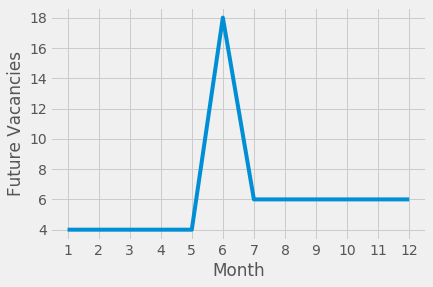

In [39]:
month=[x for x in range(1,13)]
plt.style.use("fivethirtyeight")
plt.plot(month,vac)
plt.xticks(month)
plt.xlabel("Month")
plt.ylabel("Future Vacancies")##This graph shows final output for vacancy

In [ ]:
def plot():
    month=[x for x in range(1,13)]
    plt.plot(vac,month)
    plt.xtick(month)
    plt.xlabel("Month")
    plt.ylabel("Future Vacancies")
    plt.savefig("Month_vs_Vac.png")
    

In [40]:
data["vacancies"].mean()

7.110680209295167

## Plotting Top 20 Cities

In [76]:
from collections import Counter

def city_plot():
    label=[]
    count=[]
    for i in range(20):
        label.append(Counter(data["Location"]).most_common(20)[i][0])
        count.append(Counter(data["Location"]).most_common(20)[i][1])
        plt.bar(label,count)
        plt.xlabel("Locations")
        plt.ylabel("Job Opportunity")
        plt.ylim(0,100)
        plt.label("Top 20 Locations For Jobs")
        plt.xticks(rotation=60,fontsize=8)
        plt.figure(figsize=(10,10))
        plt.savefig("City_vs_vac.png")

## Plotting Top 20 sectors

In [75]:
def sector_plot():
    label=[]
    count=[]
    for i in range(20):
        
        label.append(Counter(data["Sector"]).most_common(20)[i][0])
        count.append(Counter(data["Sector"]).most_common(20)[i][1])
        plt.bar(label,count)
        plt.xlabel("Sector")
        plt.ylabel("Job Opportunity")
        #plt.ylim(0,100)
        plt.label("Top 20 Sector For Job")
        plt.xticks(rotation=60,fontsize=8)
        plt.figure(figsize=(10,10))
        plt.savefig("Sector_vs_vac.png")

## Plotting Top 20 Professions

In [78]:
def profession_plot():
    for i in range(20):
        label=[]
        count=[]
        
        city.append(Counter(data["Job_Description"]).most_common(20)[i][0])
    
        count.append(Counter(data["Job_Description"]).most_common(20)[i][1])
        
        plt.bar(label,count)
        
        plt.xlabel("Sector")
        plt.ylabel("Job Opportunity")
        #plt.ylim(0,100)
        plt.label("Top 20 Profession For Job")
        plt.xticks(rotation=60,fontsize=8)
        plt.figure(figsize=(10,10))
        plt.savefig("Profession_vs_vac.png")